In [66]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from kneebow.rotor import Rotor

In [10]:
df_adni_full = pd.read_csv("./ADNI/data_ADNI.csv",sep=',')
df_adni_full

,Unnamed: 0,RID,GROUP_BL,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,MMSCORE,FLDSTRENG,...,rh_lingual_thickness_SD,rh_medialorbitofrontal_volume,rh_medialorbitofrontal_surface,rh_medialorbitofrontal_thickness_mean,rh_medialorbitofrontal_thickness_SD,rh_middletemporal_volume,rh_middletemporal_surface,rh_middletemporal_thickness_mean,rh_middletemporal_thickness_SD,fourthventricle_volume
0,0,2,CN,74.3,Male,16,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.694,3835,1622,2.077,0.746,15683,4272,3.028,0.649,4396
1,1,3,AD,81.3,Male,18,Not Hisp/Latino,White,20,1.5 Tesla MRI,...,0.591,3681,1734,1.942,0.696,10387,3316,2.545,0.686,3304
2,2,4,LMCI,67.5,Male,10,Hisp/Latino,White,27,1.5 Tesla MRI,...,0.588,4060,1728,2.180,0.607,11156,3598,2.670,0.631,1338
3,3,5,CN,73.7,Male,16,Not Hisp/Latino,White,29,1.5 Tesla MRI,...,0.628,5180,1868,2.543,0.709,11579,3387,2.911,0.660,1623
4,4,6,LMCI,80.4,Female,13,Not Hisp/Latino,White,25,1.5 Tesla MRI,...,0.631,3078,1241,2.141,0.701,9641,2781,2.900,0.727,1035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,814,1425,LMCI,75.6,Female,16,Not Hisp/Latino,White,28,1.5 Tesla MRI,...,0.662,3634,1457,2.286,0.715,11010,2886,3.021,0.802,981
815,815,1426,LMCI,83.4,Male,18,Not Hisp/Latino,White,26,1.5 Tesla MRI,...,0.511,4025,1703,2.199,0.856,11476,3619,2.670,0.740,3140
816,816,1427,LMCI,69.6,Female,12,Not Hisp/Latino,White,27,1.5 Tesla MRI,...,0.778,4639,1729,2.546,0.728,12498,3692,2.861,0.711,2482
817,817,1430,AD,83.4,Female,12,Not Hisp/Latino,White,21,1.5 Tesla MRI,...,0.661,3430,1213,2.737,1.089,7340,2198,2.794,0.692,1229


In [3]:
df_adni = pd.read_csv("./df_adni_gm_volumen.csv",sep=';')
df_adni

,Unnamed: 0,RID,PTGENDER,AGE,brainstem_volume,left_vessel_volume,left_caudate_volume,left_putamen_volume,opticchiasm_volume,right_vessel_volume,...,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_posteriorcingulate_volume,rh_transversetemporal_volume,rh_caudalmiddlefrontal_volume,rh_medialorbitofrontal_volume,rh_lateralorbitofrontal_volume,rh_rostralmiddlefrontal_volume,rh_caudalanteriorcingulate_volume,rh_rostralanteriorcingulate_volume
0,0,2,Male,74.3,23.003,0.063,4.395,4.892,0.308,0.077,...,13.054,11.950,3.809,0.553,6.566,3.835,6.795,16.081,2.414,1.935
1,3,5,Male,73.7,22.015,0.122,3.090,4.778,0.308,0.070,...,11.290,8.889,3.910,1.022,5.626,5.180,7.397,15.086,1.820,1.878
2,6,8,Female,84.5,19.434,0.102,2.527,3.976,0.331,0.067,...,11.031,7.352,3.176,0.568,3.546,3.435,6.036,12.716,1.926,1.767
3,8,14,Female,78.5,15.665,0.027,3.528,4.189,0.328,0.038,...,8.967,8.708,2.889,0.683,4.457,3.034,5.795,11.388,1.518,1.316
4,9,15,Male,80.8,23.706,0.151,2.923,4.351,0.307,0.100,...,9.415,7.320,2.693,0.512,3.937,3.982,5.292,11.685,2.262,1.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,735,1280,Female,70.7,20.573,0.027,3.607,5.399,0.223,0.041,...,11.835,9.473,2.998,0.793,3.844,3.812,5.897,11.660,2.252,1.652
225,741,1286,Female,75.5,20.872,0.073,4.653,5.373,0.375,0.067,...,10.623,9.537,3.082,0.883,6.041,4.744,5.509,12.911,1.296,1.026
226,742,1288,Male,59.9,24.679,0.097,3.639,6.264,0.379,0.049,...,11.897,11.143,3.155,0.823,7.391,3.903,6.904,15.807,1.526,2.079
227,752,1301,Female,72.1,24.993,0.073,3.000,4.965,0.211,0.053,...,9.390,9.850,3.043,0.615,5.034,4.696,6.203,11.176,1.633,1.279


In [46]:
df_inca = pd.read_csv("./df_inca_gm_volumen.csv",sep=';')
df_inca

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_superiorparietal,rh_superiortemporal,rh_posteriorcingulate,rh_transversetemporal,rh_caudalmiddlefrontal,rh_medialorbitofrontal,rh_lateralorbitofrontal,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate
0,0,sub-214,f,74.364384,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,7.995,8.407,2.728,0.790,6.786,5.119,6.295,12.485,1.721,1.577
1,1,sub-161,f,78.394521,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,12.380,6.722,2.839,0.481,4.228,4.611,6.172,10.610,2.139,1.795
2,2,sub-172,f,77.320548,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,11.494,8.834,2.333,0.556,3.636,4.097,5.724,9.595,1.817,1.561
3,3,sub-138,m,73.520548,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.398,12.635,2.604,0.889,4.694,5.449,7.067,13.859,1.692,1.686
4,4,sub-139,m,76.424658,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.688,10.043,2.805,0.855,4.793,6.076,6.567,12.435,1.812,1.328
5,5,sub-142,f,72.142466,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,10.261,9.337,2.221,0.654,4.719,5.160,5.663,12.078,1.205,1.230
6,6,sub-192,f,91.479452,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,10.364,9.757,2.545,0.601,4.017,5.220,6.540,12.816,1.104,1.480
7,7,sub-196,f,77.093151,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,11.453,9.556,2.531,0.794,5.301,5.494,7.040,13.688,1.247,1.594
8,8,sub-198,f,75.331507,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,9.866,9.492,2.532,0.759,4.635,4.728,6.975,11.092,1.120,1.253
9,9,sub-201,f,73.991781,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,10.643,9.164,2.409,0.697,4.082,5.025,6.287,12.608,0.602,1.684


In [47]:
df_inca["age"] = df_inca["age"].apply(lambda x: round(x, 1))
df_inca

,Unnamed: 0,participant_id,gender,age,brain-stem,left-vessel,left-caudate,left-putamen,optic-chiasm,right-vessel,...,rh_superiorparietal,rh_superiortemporal,rh_posteriorcingulate,rh_transversetemporal,rh_caudalmiddlefrontal,rh_medialorbitofrontal,rh_lateralorbitofrontal,rh_rostralmiddlefrontal,rh_caudalanteriorcingulate,rh_rostralanteriorcingulate
0,0,sub-214,f,74.4,17.4850,0.0175,3.4699,4.4771,0.1348,0.0041,...,7.995,8.407,2.728,0.790,6.786,5.119,6.295,12.485,1.721,1.577
1,1,sub-161,f,78.4,16.8912,0.0032,3.3686,4.8374,0.1614,0.0000,...,12.380,6.722,2.839,0.481,4.228,4.611,6.172,10.610,2.139,1.795
2,2,sub-172,f,77.3,15.7690,0.0064,2.7845,3.6798,0.1129,0.0133,...,11.494,8.834,2.333,0.556,3.636,4.097,5.724,9.595,1.817,1.561
3,3,sub-138,m,73.5,22.1628,0.0239,3.0680,4.7896,0.2166,0.0161,...,13.398,12.635,2.604,0.889,4.694,5.449,7.067,13.859,1.692,1.686
4,4,sub-139,m,76.4,17.3174,0.0042,2.9996,3.7887,0.1696,0.0161,...,12.688,10.043,2.805,0.855,4.793,6.076,6.567,12.435,1.812,1.328
5,5,sub-142,f,72.1,16.3012,0.0176,2.8895,3.8551,0.0904,0.0070,...,10.261,9.337,2.221,0.654,4.719,5.160,5.663,12.078,1.205,1.230
6,6,sub-192,f,91.5,17.7342,0.0600,2.6106,4.0005,0.2235,0.0116,...,10.364,9.757,2.545,0.601,4.017,5.220,6.540,12.816,1.104,1.480
7,7,sub-196,f,77.1,20.4006,0.0139,2.9633,4.4863,0.1896,0.0386,...,11.453,9.556,2.531,0.794,5.301,5.494,7.040,13.688,1.247,1.594
8,8,sub-198,f,75.3,19.7109,0.0261,2.5264,4.0270,0.1505,0.0162,...,9.866,9.492,2.532,0.759,4.635,4.728,6.975,11.092,1.120,1.253
9,9,sub-201,f,74.0,19.5976,0.1781,3.5735,4.5291,0.2393,0.0109,...,10.643,9.164,2.409,0.697,4.082,5.025,6.287,12.608,0.602,1.684


In [48]:
del df_inca["wm-hypointensities"]

In [53]:
print(len(df_inca.columns[4:]))

95


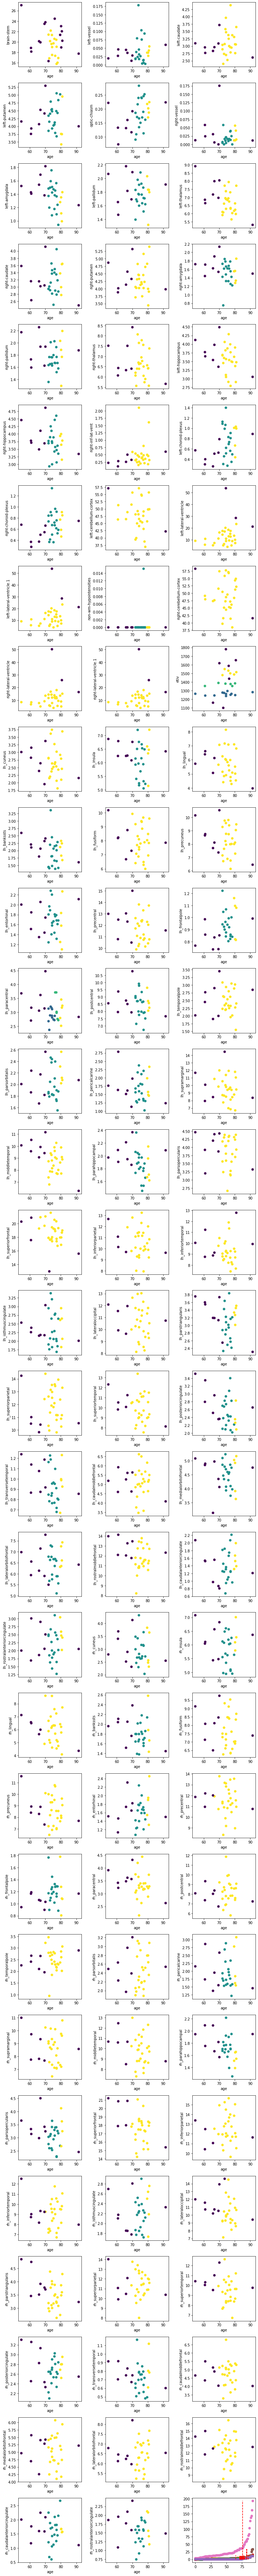

In [84]:
def plotalot(df,col,colnames,numrow,numcol):
    fig1, axes1 = plt.subplots(numrow, numcol, figsize=(10, 100))
    
    index = 0
    for i in range(0,len(colnames)):
        
        new_df = pd.DataFrame({'vol':df[colnames[i]], 'vol2': df[col]})
        idx, epsilon = get_eps(new_df,4)
        
        dbscan = DBSCAN(eps=epsilon, metric = "euclidean").fit(new_df)
        clusters = dbscan.fit_predict(new_df)
        
        df_values = new_df.values

        ax = axes1.flatten()[index]
        ax.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
        #ax.set_title("ASD") 
        ax.set_xlabel(col)
        ax.set_ylabel(colnames[i])
        #ax.set_ylim(-0.1, 1.1) 

        index += 1
        
    plt.tight_layout()
    plt.show()
    
plotalot(df_inca,"age",df_inca.columns[4:],32,3) 

In [77]:
del df_adni['nonwmhypointensities_volume']

In [80]:
len(df_adni.columns[4:])


95

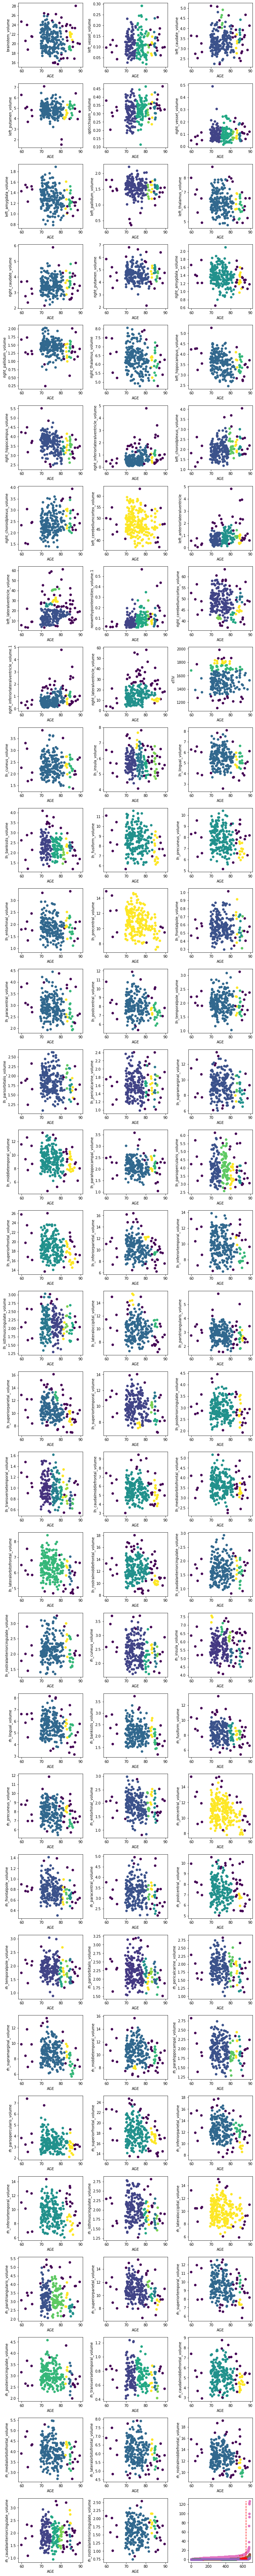

,Unnamed: 0,RID,PTGENDER,AGE,brainstem_volume,left_vessel_volume,left_caudate_volume,left_putamen_volume,opticchiasm_volume,right_vessel_volume,...,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_posteriorcingulate_volume,rh_transversetemporal_volume,rh_caudalmiddlefrontal_volume,rh_medialorbitofrontal_volume,rh_lateralorbitofrontal_volume,rh_rostralmiddlefrontal_volume,rh_caudalanteriorcingulate_volume,rh_rostralanteriorcingulate_volume
0,0,2,Male,74.3,23.003,0.063,4.395,4.892,0.308,0.077,...,13.054,11.950,3.809,0.553,6.566,3.835,6.795,16.081,2.414,1.935
1,3,5,Male,73.7,22.015,0.122,3.090,4.778,0.308,0.070,...,11.290,8.889,3.910,1.022,5.626,5.180,7.397,15.086,1.820,1.878
2,6,8,Female,84.5,19.434,0.102,2.527,3.976,0.331,0.067,...,11.031,7.352,3.176,0.568,3.546,3.435,6.036,12.716,1.926,1.767
3,8,14,Female,78.5,15.665,0.027,3.528,4.189,0.328,0.038,...,8.967,8.708,2.889,0.683,4.457,3.034,5.795,11.388,1.518,1.316
4,9,15,Male,80.8,23.706,0.151,2.923,4.351,0.307,0.100,...,9.415,7.320,2.693,0.512,3.937,3.982,5.292,11.685,2.262,1.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,735,1280,Female,70.7,20.573,0.027,3.607,5.399,0.223,0.041,...,11.835,9.473,2.998,0.793,3.844,3.812,5.897,11.660,2.252,1.652
225,741,1286,Female,75.5,20.872,0.073,4.653,5.373,0.375,0.067,...,10.623,9.537,3.082,0.883,6.041,4.744,5.509,12.911,1.296,1.026
226,742,1288,Male,59.9,24.679,0.097,3.639,6.264,0.379,0.049,...,11.897,11.143,3.155,0.823,7.391,3.903,6.904,15.807,1.526,2.079
227,752,1301,Female,72.1,24.993,0.073,3.000,4.965,0.211,0.053,...,9.390,9.850,3.043,0.615,5.034,4.696,6.203,11.176,1.633,1.279


In [85]:
df_adni_new = df_adni.dropna()
plotalot(df_adni_new,"AGE",df_adni_new.columns[4:],32,3) 
df_adni_new

In [37]:
new_df = pd.DataFrame({'vol':df_inca["left-vessel"], 'vol2': df_inca["left-caudate"]})
new_df

,vol,vol2
0,0.0175,3.4699
1,0.0032,3.3686
2,0.0064,2.7845
3,0.0239,3.0680
4,0.0042,2.9996
5,0.0176,2.8895
6,0.0600,2.6106
7,0.0139,2.9633
8,0.0261,2.5264
9,0.1781,3.5735


In [38]:
#Calculamos La distancia k para determinar nuestro valor de eps.
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)  

#Obtenemos el valor exacto de eps utilizando kneebow, esta función nos permite
#encontrar el codo de una curva rotando La curva y tomando el valor mínimo.
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1)
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

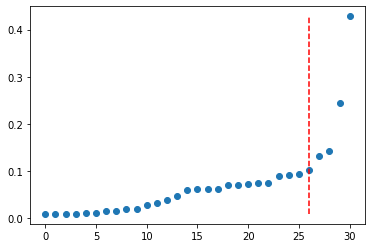

0.10230434985864498


In [39]:
idx, eps = get_eps(new_df)

plt.show()

print(eps)

[-1 -1  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1  0  0  0 -1  0
 -1  0  0  0  0  0  0]


Text(0, 0.5, 'Edad')

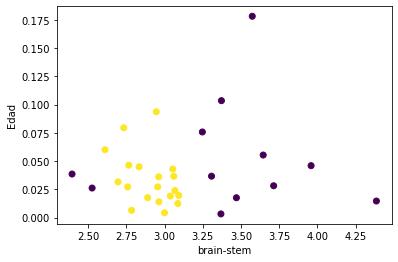

In [40]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.1, metric = "euclidean").fit(new_df)
clusters = dbscan.fit_predict(new_df)
print(clusters)
df_values = new_df.values
# Graficación de los clústers.
plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
plt.xlabel("brain-stem")
plt.ylabel("Edad")